# Download warpper for S2 data 

Wrapper script to download S2 data needed as input to TEDS

## 1. Set environment

In [1]:
import sys
import os
# define  path to search for module
sys.path.append("/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/")
os.chdir("/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/examples/exp_getS2/")

## 2. Import libraries

In [2]:
import numpy as np
from teds.sgm.download_sentinel2_albedo_co2m import download_sentinel2_albedo

## 3. Define target 

In [3]:
#station_name = 'Matimba'
station_name = 'Jaenschwalde'
#station_name = 'Belchatow'
#station_name = 'Lipetsk'

## 4. Define the configuration

##

In [4]:
config = {}
config['sentinel2'] = {}
#config['sentinel2']['band_section'] = ['B01','B02','B03','B04','B05','B06','B07', 'B8A', 'B09','B11','B12']
config['sentinel2']['band_section'] = ['B11']

config['sentinel2']['albedo_file'] ='./data/s2_co2m_baltic_sea.nc'

## 5. Download data

In [5]:
lat = np.array([53.5, 54.5, 54.5, 53.5])
lon = np.array([14, 14, 15.5, 15.5])

s2_albedos = download_sentinel2_albedo(config, lat, lon)

[20:41:50] Downloading Sentinel 2 albedo for band B11
S2A_33UVV_20221214_0_L2A/B11.tif: 100%|██████████| 49.2M/49.2M [00:28<00:00, 1.70MB/s]
S2A_33UWV_20221214_0_L2A/B11.tif: 100%|██████████| 57.1M/57.1M [00:06<00:00, 8.35MB/s]
S2A_33UVA_20221214_0_L2A/B11.tif: 100%|██████████| 37.6M/37.6M [00:05<00:00, 7.35MB/s]
S2A_33UWA_20221214_0_L2A/B11.tif: 100%|██████████| 45.8M/45.8M [00:23<00:00, 1.92MB/s]
[20:43:05] Downloading Sentinel 2 albedo for band SCL
S2A_33UVV_20221214_0_L2A/SCL.tif: 100%|██████████| 2.10M/2.10M [00:01<00:00, 1.52MB/s]
S2A_33UWV_20221214_0_L2A/SCL.tif: 100%|██████████| 2.43M/2.43M [00:01<00:00, 1.47MB/s]
S2A_33UVA_20221214_0_L2A/SCL.tif: 100%|██████████| 1.00M/1.00M [00:00<00:00, 1.02MB/s]
S2A_33UWA_20221214_0_L2A/SCL.tif: 100%|██████████| 1.45M/1.45M [00:03<00:00, 456kB/s] 


## 6. Plotting data

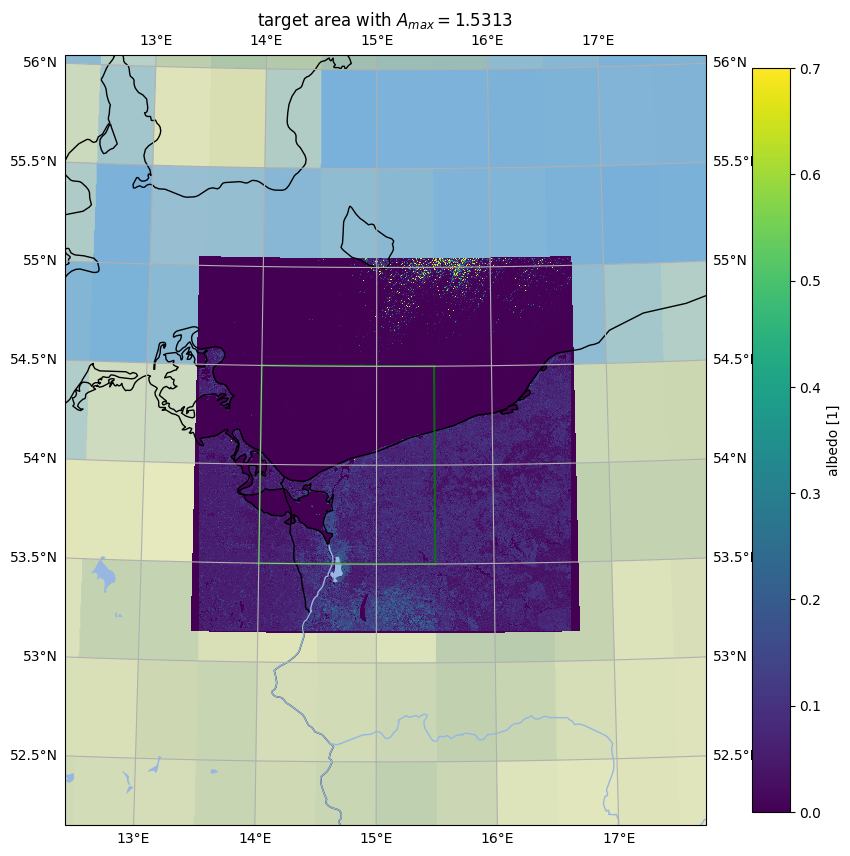

In [6]:
s2_albedo = s2_albedos[0]
#plot on lat/lon map
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.feature import LAND, COASTLINE, RIVERS, LAKES, BORDERS
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from netCDF4 import Dataset
import matplotlib.pyplot as plt

s2_albedo = s2_albedo.rio.reproject('EPSG:4326')
s2_albedo = s2_albedo.rename({'x': 'lon', 'y': 'lat'})

gm_input = '/home/jochen/TANGO_E2ES/EndtoEndProject/data/interface_data/gm/Tango_Carbon_gm_exp1.0.nc'
gm_data = Dataset(gm_input)

path = '/home/jochen/TANGO_E2ES/EndtoEndProject/data/'
reader = shpreader.Reader('/home/jochen/.local/share/cartopy/shapefiles/natural_earth/cultural/ne_110m_admin_0_countries.shp')

eps =1
lon_high = np.max(s2_albedo.lon) + eps
lon_low  = np.min(s2_albedo.lon) - eps
lat_high = np.max(s2_albedo.lat) + eps
lat_low  = np.min(s2_albedo.lat) - eps
lat_mean = np.mean(np.array(s2_albedo.lat))
lon_mean = np.mean(np.array(s2_albedo.lon))

extent = [lon_low, lon_high, lat_low, lat_high]

#interactive plotting in separate window
# %matplotlib qt  
#plotting within notebook
%matplotlib inline 
fig, ax = plt.subplots(1, 1, figsize=(12, 10), dpi=100,   subplot_kw={
    'projection': ccrs.Orthographic(lon_mean, lat_mean)},)

ax.set_extent((lon_low, lon_high, lat_low, lat_high))
ax.stock_img()
ax.add_feature(LAND)
ax.add_feature(BORDERS)
ax.add_feature(COASTLINE)
ax.add_feature(RIVERS)
ax.add_feature(LAKES)
gl = ax.gridlines(draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.set_xlabel("longitude [$^o$]")
ax.set_ylabel("latitude [$^o$]")
ax.set_title('target area with $A_{max} = $' + str(np.max(s2_albedo.values[0,:]*1.E-4)))

mesh = ax.pcolormesh(s2_albedo.lon, s2_albedo.lat, s2_albedo.values[0,:]*1.E-4, alpha=1.0, transform=ccrs.PlateCarree(),
                     cmap='viridis', vmax=0.7, vmin=0.)

lonbox = np.append(lon, lon[0])
latbox = np.append(lat, lat[0])
plt.plot(lonbox, latbox, c='green', marker='o',  alpha = 0.8, markersize = 1,
     transform=ccrs.PlateCarree(),)

cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.04, pad=0.05)
cbar.set_label('albedo [1]')